In [2]:
import os
from os import listdir, path
import random
import numpy as np
from skimage.io import imread
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

from PIL import Image
import glob

from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/

In [3]:
path_P1 = "./data/romeo/"
path_P2 = "./data/lomepal/"

In [4]:
def show(image):
    plt.imshow(np.squeeze(image.astype("uint8")), cmap="gray")
    plt.title("image shape: "+ str(image.shape), fontsize=14)
    plt.axis('off');

# Data Preprocessing

In [5]:
X, X_train, X_test = [], [], []
image_size = (1080, 1082, 3)

train_files = listdir(path.join(path_P1))
random.shuffle(train_files)

for file in train_files:
    try:
        img = load_img(path.join(path_P1, file), target_size=image_size)
        img = img.resize((541,540)) # we change the size of the image because it's to havy for my PC
        X.append(img_to_array(img))
    except: 
        print(file + " isn't loaded")
        
print("\n==========================================")        
print("Dataset loaded of "+ str(len(X))+ " images")
print("==========================================\n") 
X= np.asarray(X)

X_train, X_test = train_test_split( X, test_size=0.3, random_state=42)
print("Training set: "+ str(X_train.shape))
print("Testing set: "+str(X_test.shape))

.DS_Store isn't loaded

Dataset loaded of 161 images

Training set: (112, 540, 541, 3)
Testing set: (49, 540, 541, 3)


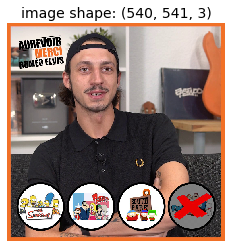

In [6]:
show(X_train[0])

# Building the AutoEncoder (AE)

### 1. Set hyperparameters

In [7]:
img_shape = (540, 541, 3)
# Size of the bottleneck (latten vector of 1 dimension)
code_size = (540)

### 2. Build the Encoder

In [8]:
encoder = Sequential()
encoder.add(InputLayer(img_shape))
encoder.add(Flatten())
encoder.add(Dense(code_size))

### 3. Build the Decoder

In [9]:
decoder = Sequential()
decoder.add(InputLayer((code_size,)))
decoder.add(Dense(np.prod(img_shape))) 
decoder.add(Reshape(img_shape))

### 4. Build the Autoencoder

clean conda caches: conda clean -tipsy

In [10]:
inp = Input(img_shape)

code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 540, 541, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 540)               473267340 
_________________________________________________________________
sequential_2 (Sequential)    (None, 540, 541, 3)       474143220 
Total params: 947,410,560
Trainable params: 947,410,560
Non-trainable params: 0
_________________________________________________________________
None


### 5. Model training
Here x equals to y because we compare the reconstructed images with the real one to evaluate the quality of our model. <br/> Ideally we expect x to be equal to y.

In [ ]:
trainning = autoencoder.fit(x=X_train, y=X_train, epochs=17,
                validation_data=[X_test, X_test])

Train on 112 samples, validate on 49 samples
Epoch 1/17
 32/112 [=======>......................] - ETA: 3:40 - loss: 17740.5371

In [ ]:
autoencoder.save("model_romeo.h5")

https://stackoverflow.com/questions/52271644/extract-encoder-and-decoder-from-trained-autoencoder

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.savefig("lossfig.png")